In [61]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score

In [62]:
response_df = pd.read_csv('../data/catalogue.csv')

In [63]:
response_df['Sentiment'] = response_df['Sentiment'].str.replace(" ","")

In [64]:
response_df['Predicted_sentiment'] = response_df['Predicted_sentiment'].str.replace(" ","")

In [65]:
y_test = response_df['Sentiment'].tolist()
y_pred = response_df['Predicted_sentiment'].tolist()

In [66]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[32,  3,  0],
       [ 0,  1,  0],
       [ 1,  2,  1]])

In [67]:
def plot_confusion_matrix(cm, classes):

    tick_marks = np.arange(len(classes))
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > (cm.max() / 2.0) else "black")
    
    plt.imshow(cm, cmap = plt.cm.YlGnBu)
    plt.colorbar()
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()

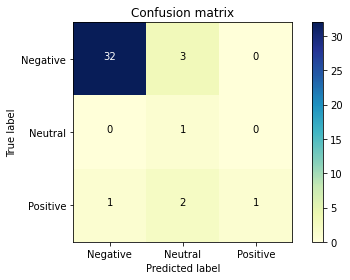

In [68]:
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Positive'])

In [69]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.85

Weighted Precision: 0.95
Weighted Recall: 0.85
Weighted F1-score: 0.87
